#데이터 전처리 (상관관계, 주성분 분석 및 데이터 나누기)

In [1]:
import sys
import time
import os
import glob
from time import sleep
import datetime
import pytz
import argparse

import numpy as np
import pandas as pd
import pickle
import joblib

import scipy
import sklearn
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import skew, kurtosis
#from Current_Feature_Extractor import Extract_Time_Features, Extract_Phase_Features, Extract_Freq_Features

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/고장 예지/2.2kW_L-DSF-01_training_with_label.csv')

In [4]:
data = data.drop(['Date'], axis = 1)
data = data.drop(['WATT'], axis = 1)

In [5]:
data

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
0,3.403320,3.123047,4.043945,2.057587,1.889543,2.245951,6.726562,6.166016,7.607422,2.296682,2.139533,2.517410,-0.008619,0.005243,0.002177,1.488438,1.532018,1.525592,2.928818,2.881944,3.021924,1.116201,1.132302,1.120866,1.654034,1.652805,1.800549,-3.141593,-3.141593,3.141593,0.243998,2.096300,-2.340298,0.012755,0.012735,0.014614,3.282771,3.058104,3.579351,0.022117,0.019693,0.023455,0.031669,0.027953,0.024256,0
1,3.283203,3.083008,4.003906,2.059709,1.883498,2.254960,6.526367,6.005859,7.487305,2.287841,2.122786,2.519664,-0.001778,-0.012131,0.006546,1.473315,1.520033,1.518037,2.852631,2.829234,2.971549,1.110759,1.127045,1.117387,1.594013,1.636853,1.775600,-3.141593,-3.141593,3.141593,0.319912,1.978385,-2.298297,0.013199,0.011972,0.015374,3.433224,3.183656,3.761500,0.013864,0.011091,0.014099,0.030992,0.039196,0.035626,0
2,3.283203,3.083008,3.963867,2.059209,1.884539,2.255280,6.526367,6.085938,7.407227,2.288444,2.123103,2.519079,-0.005667,0.008417,0.002326,1.475197,1.520606,1.516633,2.851880,2.866529,2.940450,1.111322,1.126591,1.116969,1.594400,1.635948,1.757594,-3.141593,-3.141593,3.141593,0.200456,2.059184,-2.259640,0.017959,0.015813,0.019783,3.432319,3.184894,3.755824,0.022333,0.019714,0.020837,0.024400,0.026358,0.023356,0
3,3.283203,3.123047,3.963867,2.065936,1.881936,2.254640,6.526367,6.085938,7.407227,2.295448,2.121559,2.518639,-0.000307,-0.007458,0.005278,1.475026,1.519842,1.515321,2.843178,2.868616,2.940964,1.111094,1.127328,1.117091,1.589209,1.659486,1.758093,-3.141593,-3.141593,-3.141593,0.242096,2.017423,-2.259520,0.016631,0.018814,0.021853,3.448775,3.188166,3.774974,0.020763,0.018589,0.020160,0.021301,0.024387,0.022983,0
4,3.363281,3.163086,3.963867,2.063974,1.901255,2.222268,6.686523,6.206055,7.407227,2.293941,2.139448,2.481010,-0.005117,0.001192,0.003555,1.480373,1.515924,1.510737,2.914863,2.900773,2.985569,1.111420,1.125282,1.116431,1.629518,1.663683,1.783703,-3.141593,3.141593,3.141593,0.242396,2.098883,-2.341279,0.010677,0.011181,0.010843,3.317691,3.091339,3.568165,0.012395,0.012090,0.013433,0.016602,0.018446,0.015287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,3.363281,3.163086,4.003906,2.084033,1.875850,2.275960,6.686523,6.166016,7.527344,2.334815,2.118784,2.558860,0.004386,-0.008357,-0.001355,1.486788,1.512225,1.522238,2.863835,2.910167,2.941678,1.120335,1.129506,1.124299,1.613833,1.686215,1.759216,-3.141593,3.141593,-3.141593,0.278732,2.059625,-2.338356,0.012074,0.005189,0.007708,3.407100,3.087204,3.727322,0.052801,0.051043,0.052604,0.072128,0.065349,0.071531,3
36764,3.363281,3.163086,4.043945,2.093102,1.889503,2.289674,6.686523,6.286133,7.607422,2.346897,2.133558,2.575513,-0.008000,0.004851,0.004596,1.487995,1.511570,1.522866,2.849092,2.946315,2.953751,1.121253,1.129163,1.124838,1.606841,1.674030,1.766167,-3.141593,3.141593,-3.141593,0.158154,2.179862,-2.338016,0.010459,0.009439,0.014726,3.442630,3.130037,3.764798,0.022162,0.021225,0.021776,0.023548,0.023365,0.023047,3
36765,3.363281,3.163086,4.043945,2.088117,1.887081,2.282687,6.686523,6.206055,7.527344,2.339909,2.131453,2.566823,0.004879,-0.008837,-0.000606,1.486954,1.511784,1.522252,2.857600,2.911654,2.932553,1.120583,1.129498,1.124474,1.610676,1.676179,1.771572,-3.141593,3.141593,-3.141593,0.239594,2.098643,-2.338236,0.014099,0.009980,0.009954,3.442938,3.132089,3.758024,0.048946,0.045703,0.047815,0.075257,0.066345,0.073342,3
36766,3.363281,3.203125,4.043945,2.083112,1.875770,2.266111,6.686523,6.246094,7.567383,2.341179,2.121183,2.554167,-0.005014,-0.001651,

In [6]:
data2 = data.corr()

In [7]:
data2

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
R_AbsMax,1.000000,0.976039,0.951810,0.595678,0.590620,0.560857,0.986013,0.979231,0.880473,0.656366,0.652829,0.607402,-0.210447,0.595107,0.038512,-0.229926,0.097320,-0.120938,-0.244095,0.111976,0.140463,-0.067385,-0.006884,0.062955,-0.058245,0.259941,0.006300,-0.013754,0.012482,-0.002931,-0.555717,0.978151,-0.926714,0.622119,0.534357,0.661138,0.284837,0.283625,0.270297,0.389041,0.405073,0.316112,0.193779,0.208885,0.146508,0.151402
S_AbsMax,0.976039,1.000000,0.944998,0.557187,0.567891,0.533517,0.955159,0.992243,0.858993,0.621417,0.633706,0.584699,-0.212088,0.565016,0.051174,-0.207324,0.123046,-0.098733,-0.224512,0.147746,0.145573,-0.043319,0.031191,0.077824,-0.040245,0.300372,0.020823,0.007321,0.014098,-0.000927,-0.640362,0.986538,-0.886931,0.637152,0.547956,0.682490,0.271015,0.277088,0.261770,0.396442,0.415429,0.320316,0.190434,0.209180,0.143383,0.140357
T_AbsMax,0.951810,0.944998,1.000000,0.667154,0.658479,0.683214,0.952813,0.955553,0.954192,0.727794,0.725426,0.733006,-0.196572,0.634381,0.023362,-0.275913,0.051560,-0.164511,-0.313099,0.020820,0.100899,-0.108240,-0.060157,0.040668,-0.095658,0.188795,-0.023914,0.034731,0.012872,-0.000219,-0.522290,0.949830,-0.910241,0.564175,0.481698,0.602322,0.329955,0.329415,0.339922,0.344419,0.358639,0.281676,0.185279,0.198350,0.145601,0.242925
R_AbsMean,0.595678,0.557187,0.667154,1.000000,0.987461,0.974858,0.707547,0.626479,0.833828,0.993344,0.982220,0.963293,-0.086620,0.758584,-0.238477,-0.459105,-0.339929,-0.370937,-0.590222,-0.530231,-0.047044,-0.380367,-0.564555,-0.100137,-0.305223,-0.427835,-0.156363,-0.045258,0.018604,-0.010408,0.126196,0.575089,-0.815470,0.042617,0.039109,0.020094,0.493320,0.488791,0.487994,0.031974,0.027373,0.044086,0.074317,0.068978,0.082227,0.366145
S_AbsMean,0.590620,0.567891,0.658479,0.987461,1.000000,0.962475,0.701358,0.636555,0.826340,0.977272,0.992591,0.948764,-0.079605,0.758065,-0.247316,-0.446052,-0.331205,-0.352131,-0.582844,-0.536011,-0.024111,-0.378961,-0.570063,-0.088984,-0.302536,-0.430011,-0.143075,-0.018004,0.020922,-0.010402,0.096772,0.583606,-0.808849,0.042810,0.042019,0.020828,0.484093,0.491775,0.480110,0.033976,0.030720,0.046690,0.075727,0.070231,0.083155,0.317210
T_AbsMean,0.560857,0.533517,0.683214,0.974858,0.962475,1.000000,0.667867,0.602308,0.848339,0.972359,0.964814,0.994589,-0.077627,0.725397,-0.187602,-0.472841,-0.334602,-0.397248,-0.587216,-0.512091,-0.107196,-0.370757,-0.524156,-0.126572,-0.303960,-0.405502,-0.187152,0.000854,0.016931,-0.007215,0.094259,0.553799,-0.768989,0.032553,0.027071,0.015821,0.484260,0.481748,0.500837,0.019666,0.014894,0.033541,0.076537,0.070728,0.085275,0.400825
R_P2P,0.986013,0.955159,0.952813,0.707547,0.701358,0.667867,1.000000,0.972371,0.926145,0.757719,0.753046,0.704737,-0.199636,0.664772,-0.009118,-0.290483,0.014067,-0.184709,-0.319961,0.002702,0.112095,-0.134708,-0.120596,0.026636,-0.111334,0.137050,-0.032772,-0.020091,0.012345,-0.004608,-0.437311,0.960169,-0.974322,0.547076,0.472318,0.574410,0.338832,0.337275,0.323093,0.346177,0.358427,0.286073,0.182938,0.194735,0.144553,0.179566
S_P2P,0.979231,0.992243,0.955553,0.626479,0.636555,0.602308,0.972371,1.000000,0.895243,0.686242,0.697677,0.649293,-0.207578,0.611220,0.034726,-0.245869,0.077858,-0.142073,-0.271437,0.092537,0.119271,-0.081745,-0.029836,0.050357,-0.071160,0.234175,-0.009643,0.003396,0.014640,-0.001860,-0.601599,0.994256,-0.920025,0.599907,0.517691,0.639580,0.305746,0.311667,0.296597,0.375616,0.392486,0.306340,0.190567,0.205146,0.145384,0.161350
T_P2P,0.880473,0.858993,0.954192,0.833828,0.826340,0.848339,0.926145,0.895243,1.000000,0.873079,0.872607,0.879801,-0.173048,0.727268,-0.080332,-0.359237,-0.

In [8]:
# RMS(R,S,T)를 기준으로 정상과 고장을 판단하므로, 상관관계 분석을 통해서 RMS 3상과 높은 상관관계를 보이는 변수들은 독립적이지 않다고 판단하여 제거
# T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,T_P2P,S_Skewness,TR_Level (상관관계가 3상과 모두 0.7이상이라 제거)
data3 = data
data3 = data3.drop(["T_AbsMax","R_AbsMean","S_AbsMean","T_AbsMean","R_P2P","T_P2P","S_Skewness","TR_Level"],axis=1)

In [9]:
data3

,R_AbsMax,S_AbsMax,S_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
0,3.403320,3.123047,6.166016,2.296682,2.139533,2.517410,-0.008619,0.002177,1.488438,1.532018,1.525592,2.928818,2.881944,3.021924,1.116201,1.132302,1.120866,1.654034,1.652805,1.800549,-3.141593,-3.141593,3.141593,0.243998,2.096300,0.012755,0.012735,0.014614,3.282771,3.058104,3.579351,0.022117,0.019693,0.023455,0.031669,0.027953,0.024256,0
1,3.283203,3.083008,6.005859,2.287841,2.122786,2.519664,-0.001778,0.006546,1.473315,1.520033,1.518037,2.852631,2.829234,2.971549,1.110759,1.127045,1.117387,1.594013,1.636853,1.775600,-3.141593,-3.141593,3.141593,0.319912,1.978385,0.013199,0.011972,0.015374,3.433224,3.183656,3.761500,0.013864,0.011091,0.014099,0.030992,0.039196,0.035626,0
2,3.283203,3.083008,6.085938,2.288444,2.123103,2.519079,-0.005667,0.002326,1.475197,1.520606,1.516633,2.851880,2.866529,2.940450,1.111322,1.126591,1.116969,1.594400,1.635948,1.757594,-3.141593,-3.141593,3.141593,0.200456,2.059184,0.017959,0.015813,0.019783,3.432319,3.184894,3.755824,0.022333,0.019714,0.020837,0.024400,0.026358,0.023356,0
3,3.283203,3.123047,6.085938,2.295448,2.121559,2.518639,-0.000307,0.005278,1.475026,1.519842,1.515321,2.843178,2.868616,2.940964,1.111094,1.127328,1.117091,1.589209,1.659486,1.758093,-3.141593,-3.141593,-3.141593,0.242096,2.017423,0.016631,0.018814,0.021853,3.448775,3.188166,3.774974,0.020763,0.018589,0.020160,0.021301,0.024387,0.022983,0
4,3.363281,3.163086,6.206055,2.293941,2.139448,2.481010,-0.005117,0.003555,1.480373,1.515924,1.510737,2.914863,2.900773,2.985569,1.111420,1.125282,1.116431,1.629518,1.663683,1.783703,-3.141593,3.141593,3.141593,0.242396,2.098883,0.010677,0.011181,0.010843,3.317691,3.091339,3.568165,0.012395,0.012090,0.013433,0.016602,0.018446,0.015287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,3.363281,3.163086,6.166016,2.334815,2.118784,2.558860,0.004386,-0.001355,1.486788,1.512225,1.522238,2.863835,2.910167,2.941678,1.120335,1.129506,1.124299,1.613833,1.686215,1.759216,-3.141593,3.141593,-3.141593,0.278732,2.059625,0.012074,0.005189,0.007708,3.407100,3.087204,3.727322,0.052801,0.051043,0.052604,0.072128,0.065349,0.071531,3
36764,3.363281,3.163086,6.286133,2.346897,2.133558,2.575513,-0.008000,0.004596,1.487995,1.511570,1.522866,2.849092,2.946315,2.953751,1.121253,1.129163,1.124838,1.606841,1.674030,1.766167,-3.141593,3.141593,-3.141593,0.158154,2.179862,0.010459,0.009439,0.014726,3.442630,3.130037,3.764798,0.022162,0.021225,0.021776,0.023548,0.023365,0.023047,3
36765,3.363281,3.163086,6.206055,2.339909,2.131453,2.566823,0.004879,-0.000606,1.486954,1.511784,1.522252,2.857600,2.911654,2.932553,1.120583,1.129498,1.124474,1.610676,1.676179,1.771572,-3.141593,3.141593,-3.141593,0.239594,2.098643,0.014099,0.009980,0.009954,3.442938,3.132089,3.758024,0.048946,0.045703,0.047815,0.075257,0.066345,0.073342,3
36766,3.363281,3.203125,6.246094,2.341179,2.121183,2.554167,-0.005014,0.007388,1.495946,1.521790,1.532616,2.856050,2.944627,2.962759,1.123885,1.130833,1.127115,1.614546,1.707632,1.784531,-3.141593,3.141593,3.141593,0.235970,2.100705,0.009887,0.009746,0.011754,3.497469,3.169280,3.802370,0.015485,0.015876,0.012912,0.025546,0.029880,0.029603,3


In [10]:
# 스케일링 & 주성분 분석
data4 = data3
from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler() 
rscaler.fit(data4)
data4 = rscaler.transform(data4)
data4 = pd.DataFrame(data4)
# 열 번호 맞게 label 다시 붙여서 나눠야 함

In [11]:
data4 = data3.drop(['LABEL'],axis = 1)

In [12]:
#주성분 분석
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data4)
pcscore = pca.transform(data4)

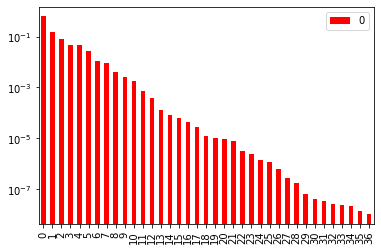

In [13]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True, color='r')

In [14]:
data5 = pd.DataFrame(pcscore)

In [15]:
data5.columns

RangeIndex(start=0, stop=37, step=1)

In [16]:
#설명력이 너무 낮은 (10^(-7) 인 29~36 colunm들도 다 제거
data5 = data5.drop([29,30,31,32,33,34,35,36],axis = 1)

In [17]:
LABEL = data3.LABEL

In [18]:
# 데이터와 라벨을 다시 붙여준다
realdata = pd.merge(data5,LABEL,left_index = True, right_index = True, how = 'left')

In [19]:
realdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,LABEL
0,-0.329978,-0.008471,0.002502,-3.816358,-3.067571,0.042469,-0.374666,-0.009002,-0.035262,-0.046875,0.041571,-0.043759,-0.011712,0.084370,-0.006117,0.029018,0.016878,-0.071487,-0.004051,-0.020391,-0.008956,0.051475,-0.035249,-0.036849,-0.004702,0.010217,0.000783,-0.000117,-0.000054,0
1,-0.371403,0.013009,-0.067209,-3.816955,-3.067675,0.044877,-0.381316,-0.102793,0.072114,-0.095797,-0.260765,0.089675,-0.043029,0.106548,0.022234,0.070950,0.028649,-0.082643,-0.028668,-0.032208,0.008569,-0.015566,-0.015833,-0.024278,0.002612,-0.005419,0.001173,-0.013020,0.002466,0
2,-0.372040,0.005170,-0.070616,-3.817110,-3.067407,0.022014,-0.377152,-0.069992,0.109157,-0.060339,-0.202235,0.066855,-0.028263,0.047259,-0.016128,0.015402,-0.051826,-0.021740,-0.016761,-0.029214,-0.006702,0.038707,-0.014558,-0.017267,0.000895,0.014060,-0.001010,-0.008512,0.007107,0
3,-0.387629,-0.059449,-0.114243,2.326969,-4.378346,0.004968,-0.334032,-0.039041,0.119408,-0.044519,-0.232663,0.089706,-0.020438,0.051268,-0.001245,0.022179,-0.017451,-0.040767,-0.033820,-0.027756,-0.008960,-0.012750,0.005884,-0.026561,-0.004795,0.011920,-0.001994,-0.005570,0.009901,0
4,-0.372539,-0.006311,0.025920,-2.505234,3.076925,0.006162,-0.412217,0.005768,-0.027595,-0.021387,0.005787,-0.043901,-0.002430,0.041013,-0.023550,-0.010737,0.007098,-0.081356,-0.071640,-0.029512,-0.022403,0.037152,-0.012361,-0.020631,-0.000433,-0.000089,0.000819,-0.003734,-0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,-0.386699,-0.064258,-0.037879,3.638584,1.766048,-0.030712,-0.369692,0.010668,0.071573,0.001443,-0.116826,0.034894,-0.004695,0.010851,0.034470,0.021282,0.048595,-0.046410,0.027094,0.015323,0.068698,-0.031309,0.031389,-0.005367,-0.008382,0.035587,0.000956,0.002448,-0.012872,3
36764,-0.391066,-0.057875,-0.039117,3.638687,1.766579,-0.030929,-0.362990,0.055498,0.197450,0.056040,-0.060607,0.002005,0.011010,-0.028999,-0.018944,-0.017345,-0.026991,0.039215,0.019348,0.013817,-0.023888,0.041711,0.015930,0.020742,-0.003650,0.012929,0.000019,-0.001015,-0.003456,3
36765,-0.389637,-0.059136,-0.037748,3.638638,1.766245,-0.022483,-0.367248,0.023605,0.147865,0.016158,-0.122567,0.026665,0.004878,-0.011276,0.025993,0.010271,0.017867,-0.024627,0.019985,0.014966,0.071665,-0.003564,0.023600,-0.001340,-0.006036,0.028624,0.001250,0.000108,-0.006829,3
36766,-0.361112,0.014324,0.019388,-2.505519,3.077155,-0.009217,-0.403538,0.045724,0.220592,0.056429,-0.143990,0.006202,0.001825,0.000551,-0.011243,-0.003847,0.032714,-0.019027,-0.011739,0.012454,-0.015429,-0.020837,0.043532,0.000744,-0.009388,-0.004343,0.001678,0.000977,-0.003041,3


In [20]:
# 데이터 셋을 train,valid,test으로 나눠준다. 비율은 7:2:1

x_train = realdata.sample(frac = 0.7)
x_valid = realdata.drop(x_train.index)
x_test = x_valid.sample(frac=0.333)
x_valid = x_valid.drop(x_test.index)

len(x_train) + len(x_valid) + len(x_test) 

36768

In [21]:
y_train = x_train['LABEL']
y_test = x_test['LABEL']
y_valid = x_valid['LABEL']

In [22]:
x_train = x_train.drop(['LABEL'],axis = 1)
x_valid = x_valid.drop(['LABEL'],axis = 1)
x_test = x_test.drop(['LABEL'],axis = 1)

In [23]:
print("x_train.shape:", x_train.shape)
print("x_valid.shape:", x_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (25738, 29)
x_valid.shape: (7357, 29)
y_train.shape: (25738,)
y_valid.shape: (7357,)
x_test.shape: (3673, 29)
y_test.shape: (3673,)


In [24]:
x_train_exp = np.expand_dims(x_train, -1)  
x_valid_exp = np.expand_dims(x_valid, -1)  
x_test_exp = np.expand_dims(x_test, -1)

print("x_train_exp의 형태:", x_train_exp.shape)
print("x_valid_exp의 형태:", x_valid_exp.shape)
print("x_test_exp의 형태:", x_test_exp.shape)

x_train_exp의 형태: (25738, 29, 1)
x_valid_exp의 형태: (7357, 29, 1)
x_test_exp의 형태: (3673, 29, 1)


In [25]:
#정상을 1로, 비정상을 0으로 바꿔줌

y_train[y_train == 0] = 1
y_valid[y_valid == 0] = 1
y_test[y_test == 0] = 1

y_train[y_train == 3] = 0
y_valid[y_valid == 3] = 0
y_test[y_test == 3] = 0

#결과 분석 및 해석 tool

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['False', 'True'], rotation=45)
    plt.yticks(tick_marks, ['False', 'True'])
    thresh = cm.max()/1.2
    normalize = False
    fmt = '.2f' if normalize else 'd'
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black", 
                 fontsize=12)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(save_path + '{}_cm.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    print(classification_report(yt, y_pred))

In [27]:
from sklearn.metrics import roc_curve, auc

def draw_roc(model,xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {};'.format(model_name))
    plt.legend(loc="lower right")
    plt.ion()
    plt.tight_layout()
    plt.savefig(save_path + '{}_roc.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()

In [28]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history["val_loss"])
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

In [29]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_" + "sparse_categorical_accuracy"])
    plt.title("model " + "Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

# 모델 & 학습 및 결과 분석(CNN)
1.(Ford 그대로) - 결과 : 정확도 98.5%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 64

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


Epoch 1/300
403/403 [==============================] - 7s 15ms/step - loss: 0.2000 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.2539 - val_sparse_categorical_accuracy: 0.9406
Epoch 2/300
403/403 [==============================] - 6s 15ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.6572 - val_sparse_categorical_accuracy: 0.6694
Epoch 3/300
403/403 [==============================] - 6s 15ms/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9632 - val_loss: 1.6339 - val_sparse_categorical_accuracy: 0.7914
Epoch 4/300
403/403 [==============================] - 6s 14ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9697 - val_loss: 1.6709 - val_sparse_categorical_accuracy: 0.3602
Epoch 5/300
403/403 [==============================] - 6s 14ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.5234 - val_sparse_categorical_accuracy: 0.8334
Epoch 6/300
403/403 [==============================] - 6s 14ms/step - loss: 0.0818 - spars

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 0s 3ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9850

Test accuracy 0.9850258827209473

Test loss 0.04472886025905609
sparse_categorical_accuracy: 98.50%


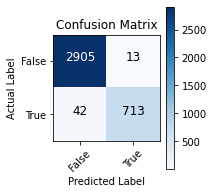

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2918
           1       0.98      0.94      0.96       755

    accuracy                           0.99      3673
   macro avg       0.98      0.97      0.98      3673
weighted avg       0.98      0.99      0.98      3673



In [ ]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

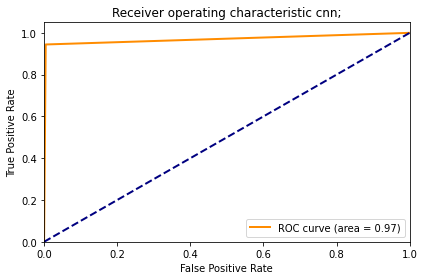

In [ ]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

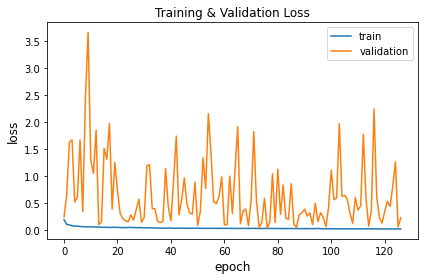

In [ ]:
plot_loss_graph(history_cnn, "cnn")

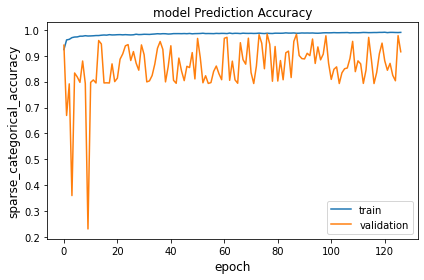

In [ ]:
plot_prediction_graph(history_cnn, "cnn")

2. Dropout 적용 & batch_size 2배
결과 - 정확도 97.6%

In [ ]:
# batch_size를 늘릴필요가 있음 (https://ju-hyang.tistory.com/28)
# 모델 튜닝 : https://hyjykelly.tistory.com/50

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, Dropout

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 128

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


Epoch 1/300
202/202 [==============================] - 6s 27ms/step - loss: 0.3273 - sparse_categorical_accuracy: 0.8680 - val_loss: 0.8436 - val_sparse_categorical_accuracy: 0.7918
Epoch 2/300
202/202 [==============================] - 5s 26ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.1902 - val_sparse_categorical_accuracy: 0.9505
Epoch 3/300
202/202 [==============================] - 5s 26ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.1864 - val_sparse_categorical_accuracy: 0.9337
Epoch 4/300
202/202 [==============================] - 5s 26ms/step - loss: 0.1299 - sparse_categorical_accuracy: 0.9530 - val_loss: 1.0327 - val_sparse_categorical_accuracy: 0.7919
Epoch 5/300
202/202 [==============================] - 5s 26ms/step - loss: 0.1148 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.1758 - val_sparse_categorical_accuracy: 0.9469
Epoch 6/300
202/202 [==============================] - 5s 25ms/step - loss: 0.1112 - spars

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 0s 3ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9766

Test accuracy 0.9765859246253967

Test loss 0.06919899582862854
sparse_categorical_accuracy: 97.66%


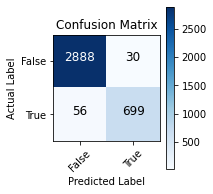

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2918
           1       0.96      0.93      0.94       755

    accuracy                           0.98      3673
   macro avg       0.97      0.96      0.96      3673
weighted avg       0.98      0.98      0.98      3673



In [ ]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

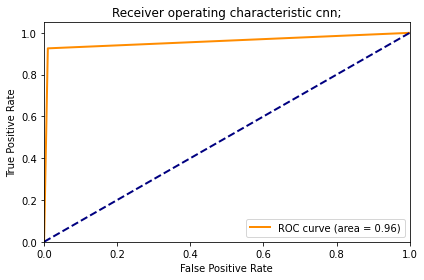

In [ ]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

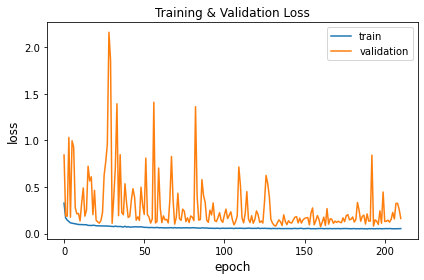

In [ ]:
plot_loss_graph(history_cnn, "cnn")

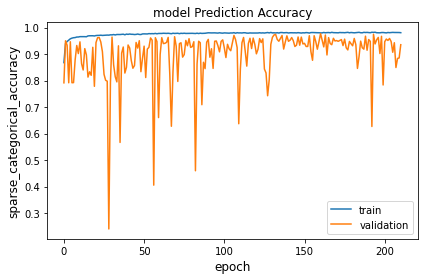

In [ ]:
plot_prediction_graph(history_cnn, "cnn")

3. 2번에 SGD 추가 활용, 결과 - 정확도 96.98% 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, Dropout

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 128

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov = True)

cnn_model.compile(
    optimizer=sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
202/202 [==============================] - 7s 27ms/step - loss: 0.4595 - sparse_categorical_accuracy: 0.7913 - val_loss: 0.4540 - val_sparse_categorical_accuracy: 0.7930
Epoch 2/300
202/202 [==============================] - 5s 27ms/step - loss: 0.2349 - sparse_categorical_accuracy: 0.9145 - val_loss: 0.6123 - val_sparse_categorical_accuracy: 0.7929
Epoch 3/300
202/202 [==============================] - 5s 27ms/step - loss: 0.1840 - sparse_categorical_accuracy: 0.9315 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9536
Epoch 4/300
202/202 [==============================] - 6s 28ms/step - loss: 0.1672 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.2021 - val_sparse_categorical_accuracy: 0.9161
Epoch 5/300
202/202 [==============================] - 6s 28ms/step - loss: 0.1563 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.4519 - val_sparse_categorical_accuracy: 0.8160
Epoch 6/300
202/202 [==============================] - 6s 28ms/step - loss: 0.1515 - spars

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 0s 2ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9698

Test accuracy 0.9697794914245605

Test loss 0.08875415474176407
sparse_categorical_accuracy: 96.98%


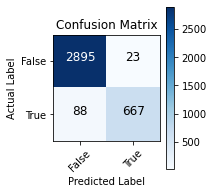

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2918
           1       0.97      0.88      0.92       755

    accuracy                           0.97      3673
   macro avg       0.97      0.94      0.95      3673
weighted avg       0.97      0.97      0.97      3673



In [ ]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

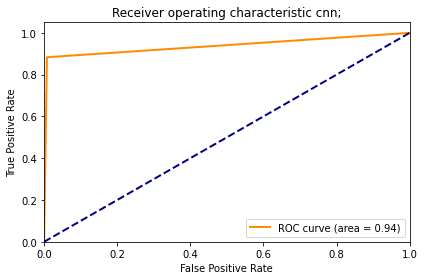

In [ ]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

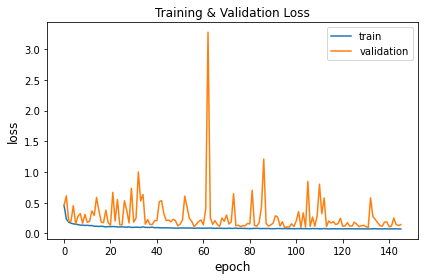

In [ ]:
plot_loss_graph(history_cnn, "cnn")

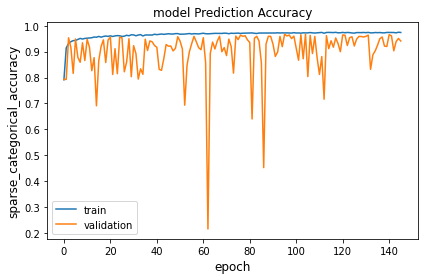

In [ ]:
plot_prediction_graph(history_cnn, "cnn")

필터32 - 94.5%

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, Dropout

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=32, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=32, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 128

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov = True)

cnn_model.compile(
    optimizer=sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
202/202 [==============================] - 4s 16ms/step - loss: 0.4723 - sparse_categorical_accuracy: 0.7927 - val_loss: 0.4723 - val_sparse_categorical_accuracy: 0.7922
Epoch 2/300
202/202 [==============================] - 3s 15ms/step - loss: 0.3103 - sparse_categorical_accuracy: 0.8711 - val_loss: 0.3337 - val_sparse_categorical_accuracy: 0.8090
Epoch 3/300
202/202 [==============================] - 3s 15ms/step - loss: 0.2311 - sparse_categorical_accuracy: 0.9144 - val_loss: 0.2186 - val_sparse_categorical_accuracy: 0.9265
Epoch 4/300
202/202 [==============================] - 3s 15ms/step - loss: 0.2130 - sparse_categorical_accuracy: 0.9195 - val_loss: 0.2060 - val_sparse_categorical_accuracy: 0.9263
Epoch 5/300
202/202 [==============================] - 3s 15ms/step - loss: 0.1998 - sparse_categorical_accuracy: 0.9243 - val_loss: 0.6644 - val_sparse_categorical_accuracy: 0.7927
Epoch 6/300
202/202 [==============================] - 3s 15ms/step - loss: 0.1864 - spars

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 0s 2ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9450

Test accuracy 0.9450041055679321

Test loss 0.14096716046333313
sparse_categorical_accuracy: 94.50%


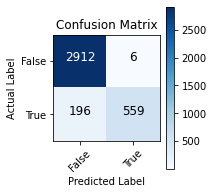

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2918
           1       0.99      0.74      0.85       755

    accuracy                           0.95      3673
   macro avg       0.96      0.87      0.91      3673
weighted avg       0.95      0.95      0.94      3673



In [ ]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

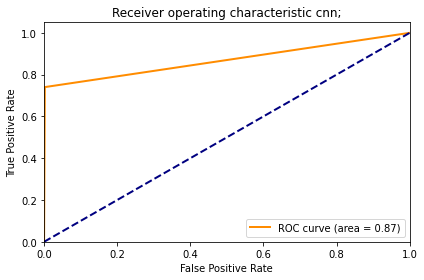

In [ ]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

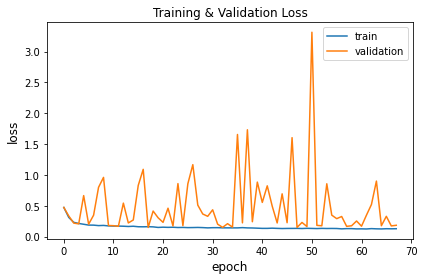

In [ ]:
plot_loss_graph(history_cnn, "cnn")

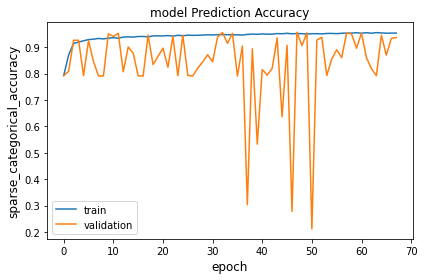

In [ ]:
plot_prediction_graph(history_cnn, "cnn")

**필터** 128 - 95.97%



filter & kernel_size :  https://kevinthegrey.tistory.com/141

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, Dropout

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=128, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=128, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 128

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov = True)

cnn_model.compile(
    optimizer=sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
202/202 [==============================] - 14s 65ms/step - loss: 0.1025 - sparse_categorical_accuracy: 0.9621 - val_loss: 1.1162 - val_sparse_categorical_accuracy: 0.7941
Epoch 2/300
202/202 [==============================] - 13s 63ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.3349 - val_sparse_categorical_accuracy: 0.8699
Epoch 3/300
202/202 [==============================] - 13s 64ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.5087 - val_sparse_categorical_accuracy: 0.8279
Epoch 4/300
202/202 [==============================] - 13s 67ms/step - loss: 0.1021 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.1574 - val_sparse_categorical_accuracy: 0.9497
Epoch 5/300
202/202 [==============================] - 13s 66ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.3938 - val_sparse_categorical_accuracy: 0.8064
Epoch 6/300
202/202 [==============================] - 13s 63ms/step - loss: 0.1023 -

In [ ]:
cnn_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8ffcdc1f10>>

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 1s 5ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9597

Test accuracy 0.9597059488296509

Test loss 0.1050976887345314
sparse_categorical_accuracy: 95.97%


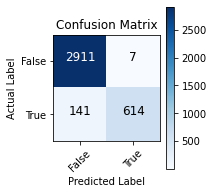

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2918
           1       0.99      0.81      0.89       755

    accuracy                           0.96      3673
   macro avg       0.97      0.91      0.93      3673
weighted avg       0.96      0.96      0.96      3673



In [ ]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

kernel_size 좀 더 크게 1번 Ford에서 kernel 사이즈만 2배

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=6, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=6,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [31]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 64

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


Epoch 1/300
403/403 [==============================] - 13s 28ms/step - loss: 0.1964 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.2510 - val_sparse_categorical_accuracy: 0.9040
Epoch 2/300
403/403 [==============================] - 11s 28ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.5907 - val_sparse_categorical_accuracy: 0.8170
Epoch 3/300
403/403 [==============================] - 11s 27ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.3794 - val_sparse_categorical_accuracy: 0.8131
Epoch 4/300
403/403 [==============================] - 11s 28ms/step - loss: 0.0702 - sparse_categorical_accuracy: 0.9738 - val_loss: 1.6045 - val_sparse_categorical_accuracy: 0.3694
Epoch 5/300
403/403 [==============================] - 11s 28ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6762 - val_sparse_categorical_accuracy: 0.8054
Epoch 6/300
403/403 [==============================] - 11s 28ms/step - loss: 0.0609 -

In [32]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 1s 4ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9853

Test accuracy 0.9852980971336365

Test loss 0.06267591565847397
sparse_categorical_accuracy: 98.53%


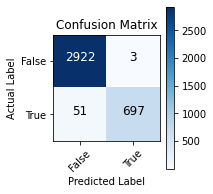

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2925
           1       1.00      0.93      0.96       748

    accuracy                           0.99      3673
   macro avg       0.99      0.97      0.98      3673
weighted avg       0.99      0.99      0.99      3673



In [34]:
import matplotlib.pyplot as plt
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

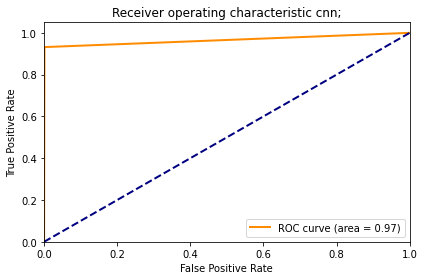

In [35]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

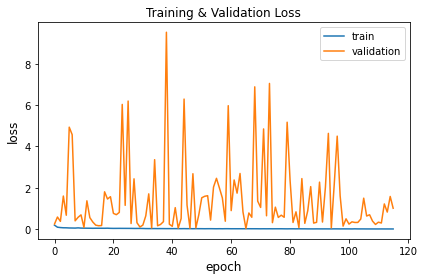

In [36]:
plot_loss_graph(history_cnn, "cnn")


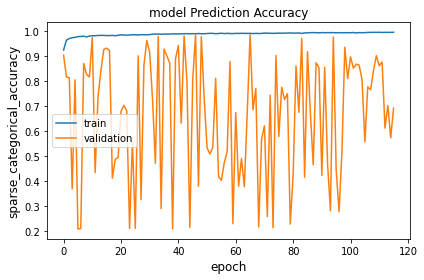

In [37]:
plot_prediction_graph(history_cnn, "cnn")

처음 필터 128, 커널 6, 드롭아웃 0.25 2개, 배치사이즈 128

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, Dropout

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=6, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=6, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=6,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [40]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path = '/content/drive/MyDrive/고장 예지/save/'

epochs = 300
batch_size = 128

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


Epoch 1/300
202/202 [==============================] - 17s 78ms/step - loss: 0.3657 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.6901 - val_sparse_categorical_accuracy: 0.7943
Epoch 2/300
202/202 [==============================] - 16s 77ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9406 - val_loss: 0.4003 - val_sparse_categorical_accuracy: 0.8279
Epoch 3/300
202/202 [==============================] - 16s 77ms/step - loss: 0.1320 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1673 - val_sparse_categorical_accuracy: 0.9543
Epoch 4/300
202/202 [==============================] - 16s 77ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9589 - val_loss: 0.1687 - val_sparse_categorical_accuracy: 0.9466
Epoch 5/300
202/202 [==============================] - 16s 78ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.1721 - val_sparse_categorical_accuracy: 0.9384
Epoch 6/300
202/202 [==============================] - 16s 79ms/step - loss: 0.0987 -

In [41]:
import tensorflow as tf
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 1s 5ms/step - loss: 0.0300 - sparse_categorical_accuracy: 0.9872

Test accuracy 0.9872038960456848

Test loss 0.030008114874362946
sparse_categorical_accuracy: 98.72%


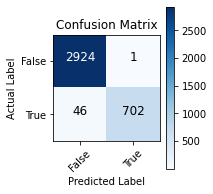

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2925
           1       1.00      0.94      0.97       748

    accuracy                           0.99      3673
   macro avg       0.99      0.97      0.98      3673
weighted avg       0.99      0.99      0.99      3673



In [42]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

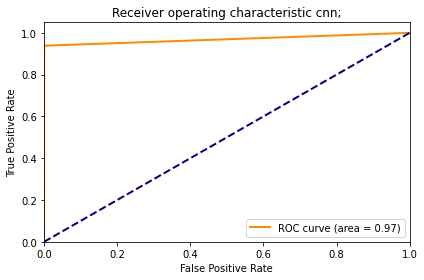

In [43]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

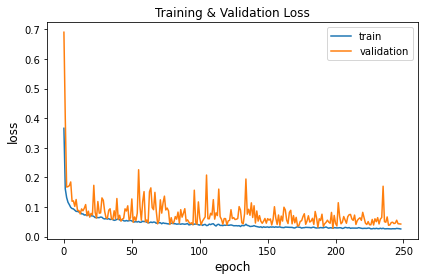

In [44]:
plot_loss_graph(history_cnn, "cnn")

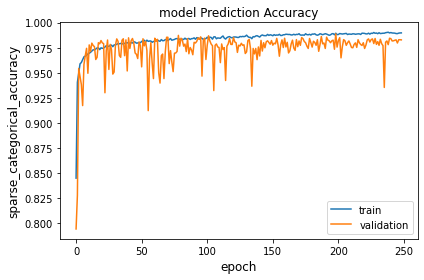

In [45]:
plot_prediction_graph(history_cnn, "cnn")